In [1]:
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import initdirs

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd
import os

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline

from visionfuncs.io import open_image
from visionfuncs import geometry

from visiongraph.features import create_extended_feature_matching_cg,  METHOD_PARAMS

In [4]:
im_gray_1 = open_image(os.path.join(initdirs.DATA_DIR, 'robotmac/left_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)
im_gray_2 = open_image(os.path.join(initdirs.DATA_DIR, 'robotmac/right_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)

In [5]:
CHOSEN_METHOD = 'orb'

In [6]:
cg_match_ext = create_extended_feature_matching_cg(CHOSEN_METHOD)

In [7]:
ft = {p: None for p in METHOD_PARAMS[CHOSEN_METHOD]}
ft['mask_1'] = None
ft['mask_2'] = None
ft['normType'] = cv2.NORM_HAMMING
ft['crossCheck'] = True

runner_match = CompGraphRunner(cg_match_ext, frozen_tokens=ft)

In [8]:
runner_match.run(image_1=im_gray_1, image_2=im_gray_2)

runner_match['keypoints_paired']

array([[ 599.04003906,  321.12002563,  495.36001587,  345.6000061 ],
       [ 597.19689941,  321.40805054,  493.51687622,  346.29125977],
       [ 603.41766357,  290.30404663,  499.7376709 ,  315.18725586],
       ...,
       [ 584.40002441,  588.        ,  972.51855469,  624.15368652],
       [ 651.94000244,  527.52398682, 1015.23480225,  622.08013916],
       [ 640.        ,  563.        , 1074.81616211,  642.81604004]])

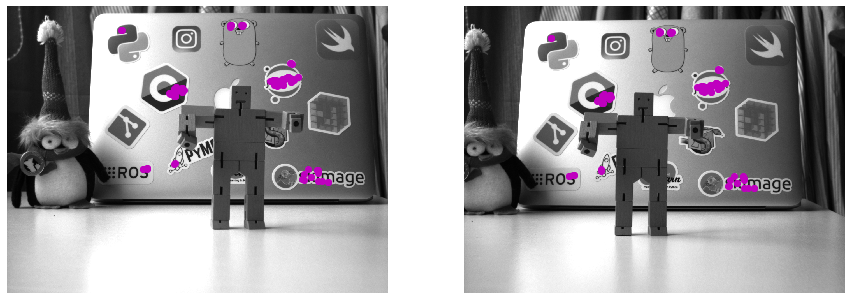

In [9]:
_ = plt.figure(figsize=(15, 15))

N_KEYPOINTS = 100

_ = plt.subplot(1, 2, 1)
_ = plt.axis('off')
_ = plt.imshow(im_gray_1, cmap='gray')
_ = plt.plot( runner_match['keypoints_paired'][:N_KEYPOINTS, 0], runner_match['keypoints_paired'][:N_KEYPOINTS, 1], 'mo' )

_ = plt.subplot(1, 2, 2)
_ = plt.axis('off')
_ = plt.imshow(im_gray_2, cmap='gray')
_ = plt.plot( runner_match['keypoints_paired'][:N_KEYPOINTS, 2], runner_match['keypoints_paired'][:N_KEYPOINTS, 3], 'mo' )

In [10]:
# Projection matrices are not from the used cameras. They are 

P1 = np.array([[534.9331565 ,   0.        , 341.16282272,   0.        ],
       [  0.        , 534.9331565 , 243.19185257,   0.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ]])


P2 = np.array([[ 5.34933156e+02,  0.00000000e+00,  3.41162823e+02,
        -1.78041986e+04],
       [ 0.00000000e+00,  5.34933156e+02,  2.43191853e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00]])

points1 = runner_match['keypoints_paired'][:N_KEYPOINTS, :2]
points2 = runner_match['keypoints_paired'][:N_KEYPOINTS, 2:]

ptcloud = geometry.triangulate_points(P1, P2, points1, points2)

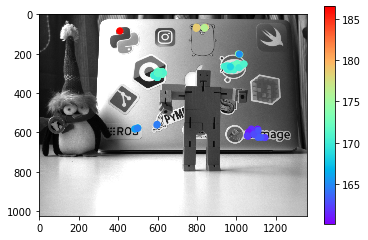

In [11]:
def plot_depth():
    
    fig = plt.figure()

    plt.imshow(im_gray_1, cmap='gray')
    points = plt.scatter(

        runner_match['keypoints_paired'][:N_KEYPOINTS, 0], 
        runner_match['keypoints_paired'][:N_KEYPOINTS, 1], 
        c=ptcloud[:, 2],
        cmap='rainbow'

    )

    fig.colorbar(points)
    
plot_depth()